<a href="https://colab.research.google.com/github/RickyMacharm/pneumonia/blob/master/Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rickyscharm","key":"ef82a138d479e46dd88f90cf1f580fda"}'}

In [0]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 67 Apr 20 06:45 kaggle.json


In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json


In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Kaggle/'


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from fastai import *
from fastai.vision import *

In [0]:

path = Path(base_dir + 'pneumonia/chest_xray/train/')

path.mkdir(parents=True, exist_ok=True)


In [0]:
# Lets check and see the files that ready for us to use
path.ls()

[PosixPath('/content/gdrive/My Drive/Kaggle/pneumonia/chest_xray/train/NORMAL'),
 PosixPath('/content/gdrive/My Drive/Kaggle/pneumonia/chest_xray/train/PNEUMONIA'),
 PosixPath('/content/gdrive/My Drive/Kaggle/pneumonia/chest_xray/train/.DS_Store')]

In [0]:
classes = ['NORMAL','PNEUMONIA']

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

NORMAL


PNEUMONIA


In [0]:
np.random.seed(44)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

['NORMAL', 'PNEUMONIA']

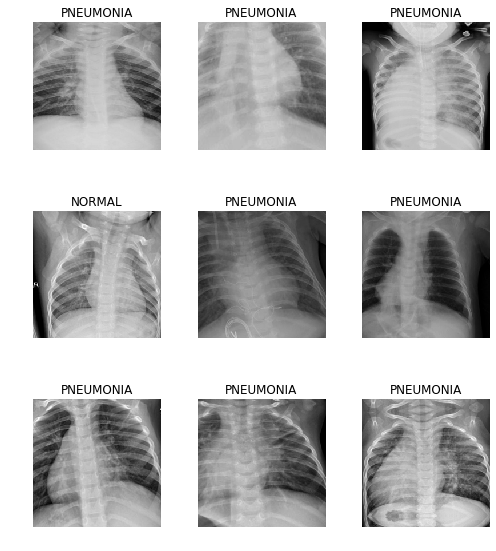

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['NORMAL', 'PNEUMONIA'], 2, 4173, 1043)

In [0]:
print(data.classes)
len(data.classes),data.c

['NORMAL', 'PNEUMONIA']


(2, 2)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.380958,0.237091,0.069032,01:16
1,0.234802,0.168737,0.057526,01:15
2,0.176776,0.161341,0.046980,01:15
3,0.145363,0.146502,0.051774,01:16
4,0.130454,0.124137,0.045062,01:15


In [0]:
learn.save('xray-stage-1')


In [0]:

learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


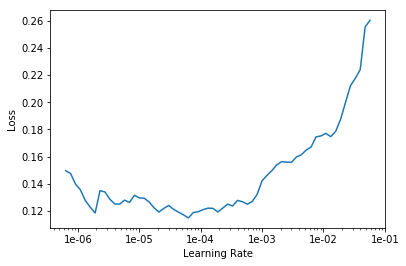

In [0]:

learn.recorder.plot()

In [0]:

learn.fit_one_cycle(3, 3e-06)

epoch,train_loss,valid_loss,error_rate,time
0,0.040256,0.078934,0.023011,01:17
1,0.032892,0.082194,0.022052,01:17
2,0.031219,0.071632,0.021093,01:16


In [0]:
learn.save('xray-stage-2')

In [0]:
learn.load('xray-stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (4173 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
Path: /content/gdrive/My Drive/Kaggle/pneumonia/chest_xray/train;

Valid: LabelList (1043 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
PNEUMONIA,PNEUMONIA,PNEUMONIA,PNEUMONIA,PNEUMONIA
Path: /content/gdrive/My Drive/Kaggle/pneumonia/chest_xray/train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride

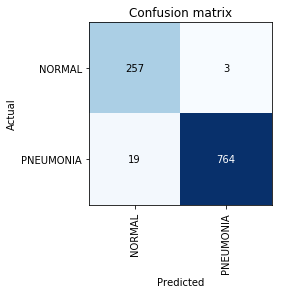

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


In [0]:

interp.most_confused(min_val=2)

[('PNEUMONIA', 'NORMAL', 19), ('NORMAL', 'PNEUMONIA', 3)]

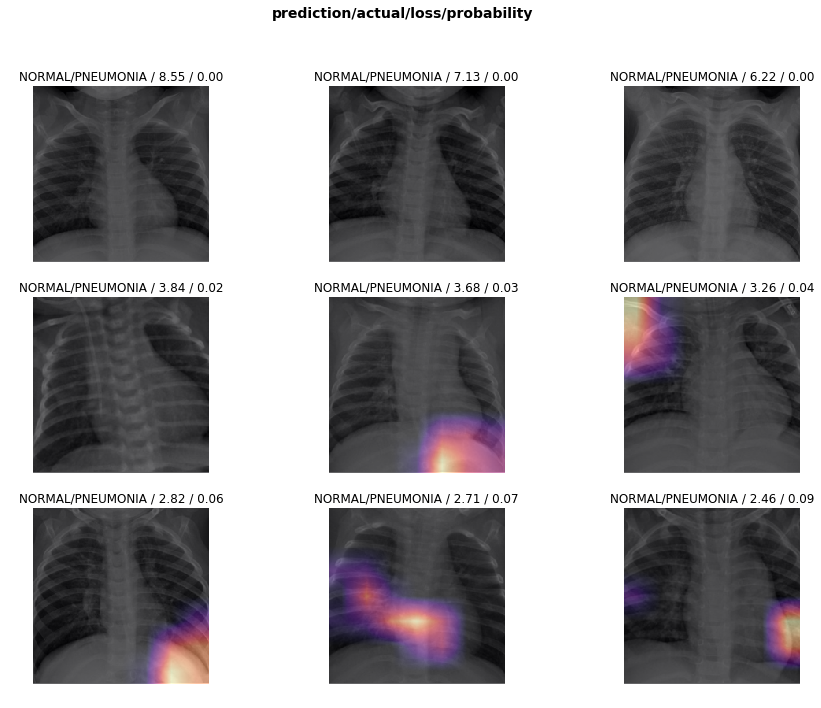

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
learn.export()